<a href="https://colab.research.google.com/github/Saifullah785/hands-on-ml-notes-practice/blob/main/Chapter_03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the sys module
import sys
# Assert that the Python version is 3.7 or higher
assert sys.version_info >= (3, 7)

In [5]:
# Import the version class from the packaging module
from packaging import version

# Import the sklearn library
import sklearn

# Assert that the scikit-learn version is 1.0.0 or higher
assert version.parse(sklearn.__version__) >= version.parse("1.0.0")

In [7]:
# Import the matplotlib.pyplot module for plotting
import matplotlib.pyplot as plt

# Set default font size for plots
plt.rc('font', size=14)
# Set default label and title sizes for axes
plt.rc('axes', labelsize=14, titlesize=14)
# Set default font size for the legend
plt.rc('legend', fontsize=14)
# Set default label size for x-axis ticks
plt.rc('xtick', labelsize=10)
# Set default label size for y-axis ticks
plt.rc('ytick', labelsize=10)

# **Mnist**

In [8]:
# Import the fetch_openml function from sklearn.datasets
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset and store it in the 'mnist' variable
# as_frame=False means the data will be returned as NumPy arrays
mnist = fetch_openml('mnist_784', as_frame=False)
# Display the contents of the 'mnist' object
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47

In [9]:
# extra code - it's a bit too long
# Print the description of the MNIST dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [10]:
# Print the keys of the mnist dataset dictionary
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [11]:
# Assign the data (images) to X and the target (labels) to y
X , y = mnist.data, mnist.target
# Display the features (image data)
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
# Print the shape of the features array (number of samples, number of features)
X.shape

(70000, 784)

In [13]:
# Display the target labels
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [14]:
# Print the shape of the target array (number of samples)
y.shape

(70000,)

In [15]:
# Calculate the number of pixels in a 28x28 image
28 *28

784

Saving figure some_digit_plot


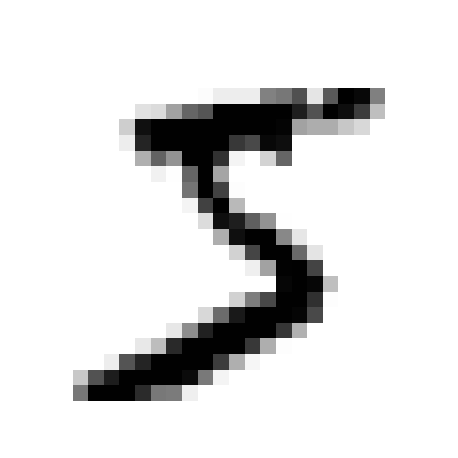

In [17]:
# Import the matplotlib.pyplot module for plotting
import matplotlib.pyplot as plt
# Import the os module for interacting with the operating system
import os

# extra code - add a save_fig() helper function
# Define the path to save images
IMAGES_PATH = "." # or any other path you prefer to save the images
# Create the directory if it doesn't exist
os.makedirs(IMAGES_PATH, exist_ok=True)

# Define a function to save figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    # Create the full path for saving the figure
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    # Print a message indicating the figure is being saved
    print("Saving figure", fig_id)
    # Apply tight layout to the plot if specified
    if tight_layout:
        plt.tight_layout()
    # Save the figure to the specified path
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Define a function to plot a single digit image
def plot_digit(image_data):
  # Reshape the 1D image data into a 28x28 2D array
  image = image_data.reshape(28, 28)
  # Display the image in grayscale
  plt.imshow(image, cmap='binary')
  # Turn off the axis
  plt.axis('off')

# Get the first digit from the dataset
some_digit = X[0]
# Plot the first digit
plot_digit(some_digit)
# Save the plot
save_fig('some_digit_plot')
# Show the plot
plt.show()

In [18]:
# Print the label of the first digit
y[0]

'5'

Saving figure mnist_digits_plot


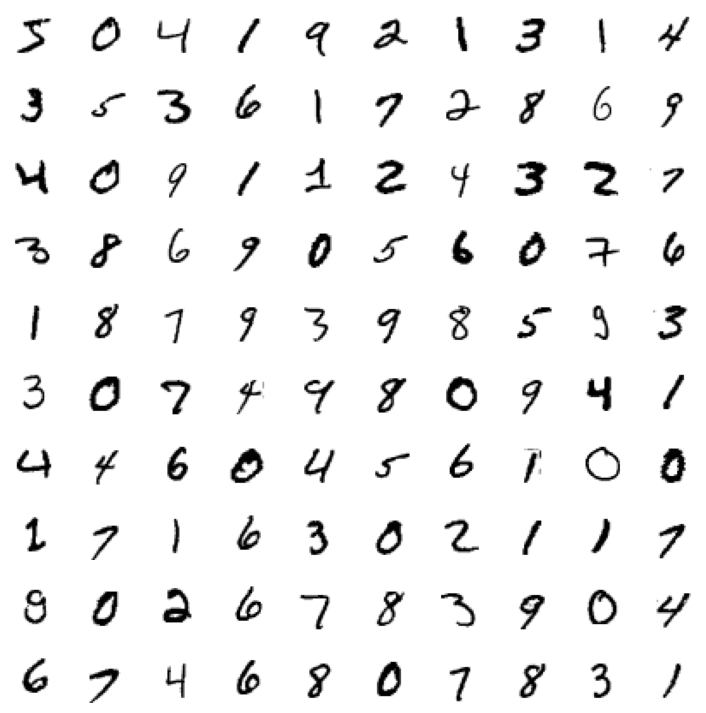

In [19]:
# Create a figure with a specified size
plt.figure (figsize=(9, 9))
# Loop through the first 100 images
for idx, image_data in enumerate(X[:100]):
  # Create subplots in a 10x10 grid
  plt.subplot(10, 10, idx + 1)
  # Plot each digit
  plot_digit(image_data)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.5)
# Save the figure
save_fig('mnist_digits_plot',tight_layout=False)
# Show the plot
plt.show()

In [20]:
# Split the data into training and testing sets
# The first 60000 samples are for training, the rest for testing
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# **Training a Binary Classifier**

In [23]:
# Create binary target variables: True if the digit is '5', False otherwise
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [24]:
# Import the SGDClassifier from sklearn.linear_model
from sklearn.linear_model import SGDClassifier

# Create an instance of the SGDClassifier with a random state for reproducibility
sgd_clf = SGDClassifier(random_state=42)
# Train the classifier on the training data
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [25]:
# Use the trained classifier to predict if the first digit (some_digit) is a '5'
sgd_clf.predict ([some_digit])

array([ True])

# **Performance Measures**

**Measuring Accuracy Using Cross Validation**

In [26]:
# Import cross_val_score from sklearn.model_selection
from sklearn.model_selection import cross_val_score
# Perform cross-validation with 3 folds and evaluate accuracy
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [28]:
# Import StratifiedKFold and clone from sklearn.model_selection and sklearn.base
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Create a StratifiedKFold object with 3 splits
skfolds = StratifiedKFold(n_splits=3)

# Iterate through the splits
for train_index, test_index in skfolds.split(X_train, y_train_5):
  # Create a clone of the SGDClassifier for each fold
  clone_clf = clone(sgd_clf)
  # Split the training data into training and validation folds
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  # Train the clone classifier on the training fold
  clone_clf.fit(X_train_folds, y_train_folds)
  # Make predictions on the validation fold
  y_pred = clone_clf.predict(X_test_fold)
  # Count the number of correct predictions
  n_correct = sum(y_pred == y_test_fold)
  # Print the accuracy for the current fold
  print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [29]:
# Import DummyClassifier from sklearn.dummy
from sklearn.dummy import DummyClassifier

# Create an instance of the DummyClassifier
dummy_clf = DummyClassifier()
# Train the dummy classifier on the training data
dummy_clf.fit(X_train, y_train_5)
# Check if the dummy classifier predicts True for any samples in the training set
print(any(dummy_clf.predict(X_train)))

False


In [30]:
# Perform cross-validation with 3 folds and evaluate accuracy of the dummy classifier
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

# **Confusion Matrix**

In [31]:
# Import cross_val_predict from sklearn.model_selection
from sklearn.model_selection import cross_val_predict

# Perform cross-validation and get the predictions for each sample in the training set
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [32]:
# Import confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix using the true labels and predicted labels
cm = confusion_matrix(y_train_5, y_train_pred)
# Display the confusion matrix
cm

array([[53892,   687],
       [ 1891,  3530]])

In [33]:
# Create a perfect prediction scenario where predictions are the same as the true labels
y_train_perfect_predictions = y_train_5
# Calculate the confusion matrix for the perfect predictions
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])